> ### Importing the necessary libraries

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

> ### Setting up the paths of the input data 

In [6]:
data='../input/car-damage-detection/data1a'
train=os.path.join(data,'training/')
val=os.path.join(data,'validation/')

train_dam=os.path.join(train,'00-damage')
train_whole=os.path.join(train,'01-whole')

val_dam=os.path.join(val,'00-damage')
val_whole=os.path.join(val,'01-whole')

> ### Exploratory Data Analysis

In [11]:
print("Total Training images : ",len(os.listdir(train_dam))+len(os.listdir(train_whole)))
print("Total validation images : ",len(os.listdir(val_dam))+len(os.listdir(val_whole)))
print("Total Damaged Car images : ",len(os.listdir(train_dam))+len(os.listdir(val_dam)))
print("Total nodamage Car images : ",len(os.listdir(train_whole))+len(os.listdir(val_whole)))
#we can see that the total images of damaged and undamaged car (across the whole data) is the same)

Total Training images :  1840
Total validation images :  460
Total Damaged Car images :  1150
Total nodamage Car images :  1150


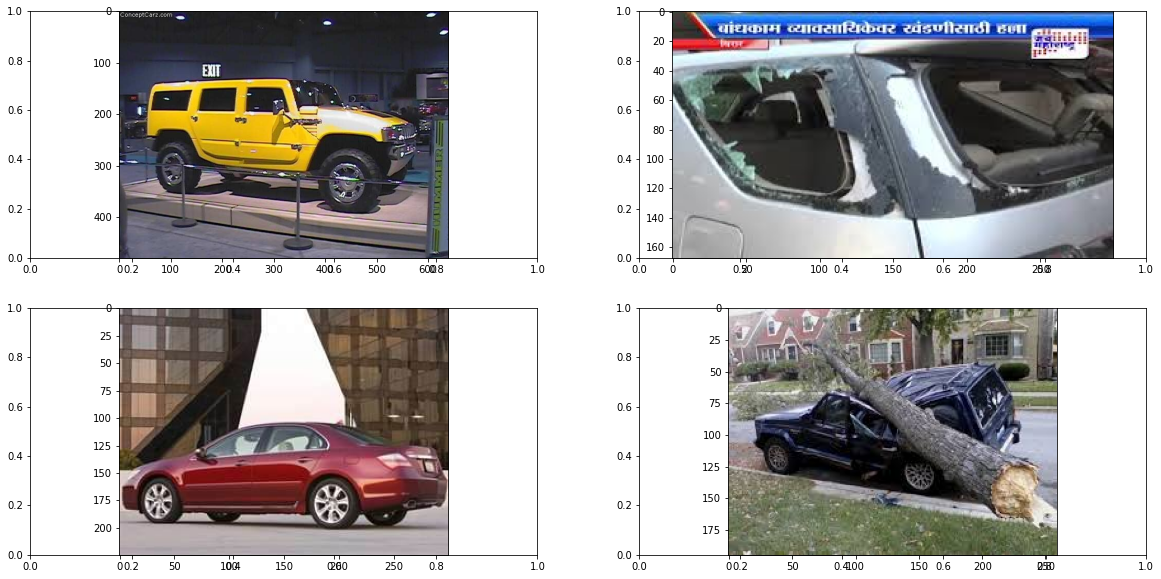

In [16]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
im1=cv2.imread("../input/car-damage-detection/data1a/training/01-whole/0002.jpg")
fig.add_subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
im2=cv2.imread("../input/car-damage-detection/data1a/training/00-damage/0001.JPEG")
fig.add_subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
im3=cv2.imread("../input/car-damage-detection/data1a/validation/01-whole/0001.jpg")
fig.add_subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
im4=cv2.imread("../input/car-damage-detection/data1a/validation/00-damage/0001.JPEG")
fig.add_subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(im4, cv2.COLOR_BGR2RGB))


# here we notice that each of the image have different height and width


> ### Data Augumentation

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30, zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [18]:
# Converting images to 125,125 size and using a batch size of 30 for training and validation sets
train_set = train_datagen.flow_from_directory(train,  target_size=(125, 125), batch_size=32, class_mode='binary')
validation_set = val_datagen.flow_from_directory(val,target_size=(125, 125),batch_size=32,class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


> #### Used ResNet50 and DenseNet121 and found out DenseNet121 to be the best Model
> #### Tried out different learning rates and found 2e-4 to be suitable ( tried 1e-3, 2e-3, 2e-4)

In [20]:
#defining model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121
import keras

In [72]:
model=keras.Sequential([DenseNet121(input_shape =(125,125, 3),include_top=False,weights='imagenet'),tf.keras.layers.Flatten(),tf.keras.layers.Dense(512, activation='relu'),tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=2e-4),metrics=['Accuracy','Precision','Recall'])

In [73]:
#training the model
stats=model.fit(train_set,epochs=15,validation_data=validation_set,verbose=1)

Epoch 1/15
58/58 [==============================] - 39s 357ms/step - loss: 0.8684 - Accuracy: 0.8098 - precision: 0.8253 - recall: 0.7859 - val_loss: 5.2835 - val_Accuracy: 0.5065 - val_precision: 0.5033 - val_recall: 1.0000
Epoch 2/15
58/58 [==============================] - 19s 320ms/step - loss: 0.3249 - Accuracy: 0.8761 - precision: 0.8853 - recall: 0.8641 - val_loss: 2.6914 - val_Accuracy: 0.6891 - val_precision: 0.6179 - val_recall: 0.9913
Epoch 3/15
58/58 [==============================] - 19s 321ms/step - loss: 0.2385 - Accuracy: 0.9071 - precision: 0.9075 - recall: 0.9065 - val_loss: 9.3733 - val_Accuracy: 0.6348 - val_precision: 0.5783 - val_recall: 0.9957
Epoch 4/15
58/58 [==============================] - 19s 325ms/step - loss: 0.2308 - Accuracy: 0.9103 - precision: 0.9153 - recall: 0.9043 - val_loss: 1.9943 - val_Accuracy: 0.8000 - val_precision: 0.7170 - val_recall: 0.9913
Epoch 5/15
58/58 [==============================] - 18s 307ms/step - loss: 0.1874 - Accuracy: 0.9353

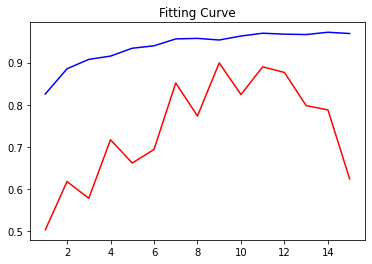

In [76]:
ep=[]
for i in range(1,16):
    ep.append(i)
train_accuracy = stats.history['precision']
val_accuracy = stats.history['val_precision']

plt.plot(ep,train_accuracy,'b',label='Training accuracy')
plt.plot(ep, val_accuracy,'r', label='Validation accuracy')
plt.title('Fitting Curve')
plt.show()


## optimum model around epoch of 5


> ### Saving the weights

In [89]:
#weights saving
model.save("weights1.h5")